In [50]:
%load_ext autoreload
%autoreload 2

import scanpy
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import utils
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
sce_4eq = scanpy.read_h5ad('data/zheng/sce_full_Zhengmix4eq.h5ad')
data_4eq, cs_4eq, labels_4eq = utils.parse_h5ad(sce_4eq, 'phenoid')
data_4eq = np.log1p(data_4eq)

In [4]:
C_4eq, avg_inter_4eq, avg_intra_4eq = utils.get_compressibility(data_4eq, cs_4eq, 4, True)
avg_inter_4eq, avg_intra_4eq

/Users/nikhildeorkar/code/school/pca-compression/utils.py:137: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D


(array([2.01965211, 1.69404992, 2.25238332, 2.32133826]),
 array([5.35547902, 5.28843597, 6.7787933 , 5.2733178 ]))

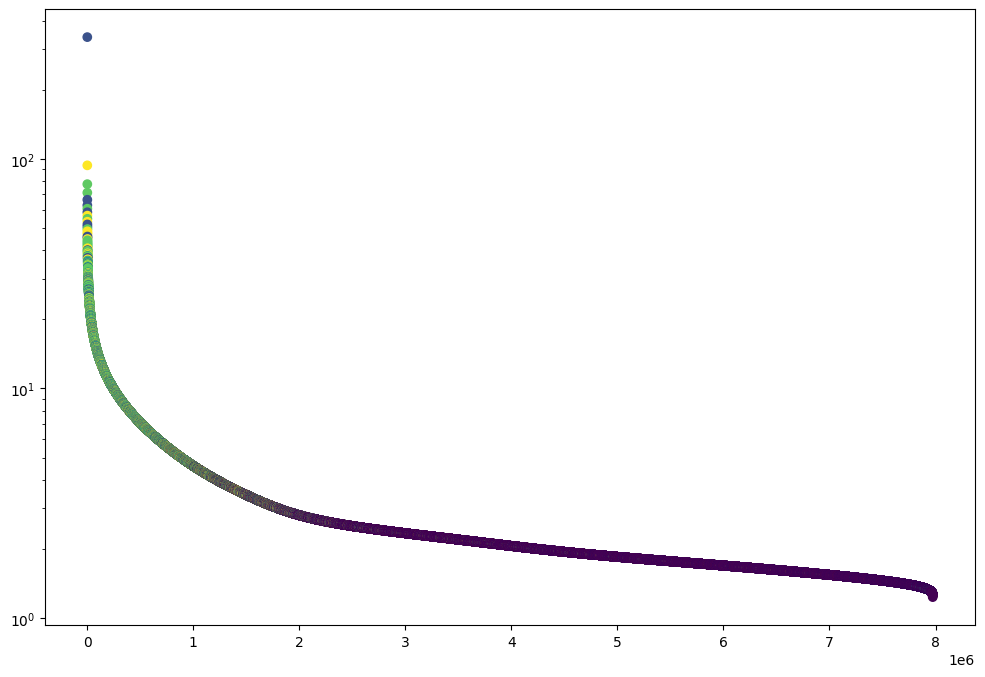

In [35]:
cgraph_4eq = utils.compression_grouping(C_4eq, cs_4eq)[::-1]
step_size = 100
index = list(range(0, len(cgraph_4eq), step_size))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.scatter(index, cgraph_4eq[index, 0], c=cgraph_4eq[index, 1])
# Set vertical scale to be logarithmic
plt.yscale('log')
plt.show()

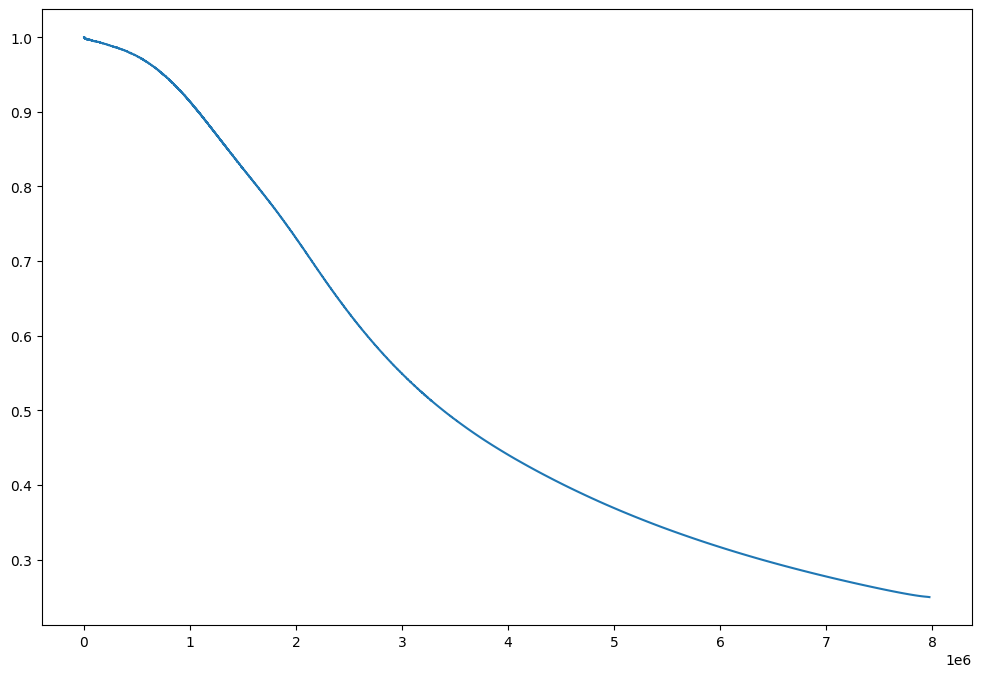

In [36]:
curr = 0
prop = []
for i in range(len(cgraph_4eq)): 
    if cgraph_4eq[i, 1] != 0: 
        curr += 1
    prop.append(curr / (i + 1))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.plot(range(len(prop)), prop)
plt.show()

In [37]:
sce_4uneq = scanpy.read_h5ad('data/zheng/sce_full_Zhengmix4uneq.h5ad')
data_4uneq, cs_4uneq, labels_4uneq = utils.parse_h5ad(sce_4uneq, "phenoid")
data_4uneq = np.log1p(data_4uneq)

In [39]:
C_4uneq, avg_inter_4uneq, avg_intra_4uneq = utils.get_compressibility(data_4uneq, cs_4uneq, 4, True)
avg_inter_4uneq, avg_intra_4uneq

/Users/nikhildeorkar/code/school/CURVE/utils.py:124: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D


(array([1.93046897, 1.70815702, 2.40844891, 2.02957598]),
 array([5.05596903, 5.28627308, 6.44798877, 4.78318257]))

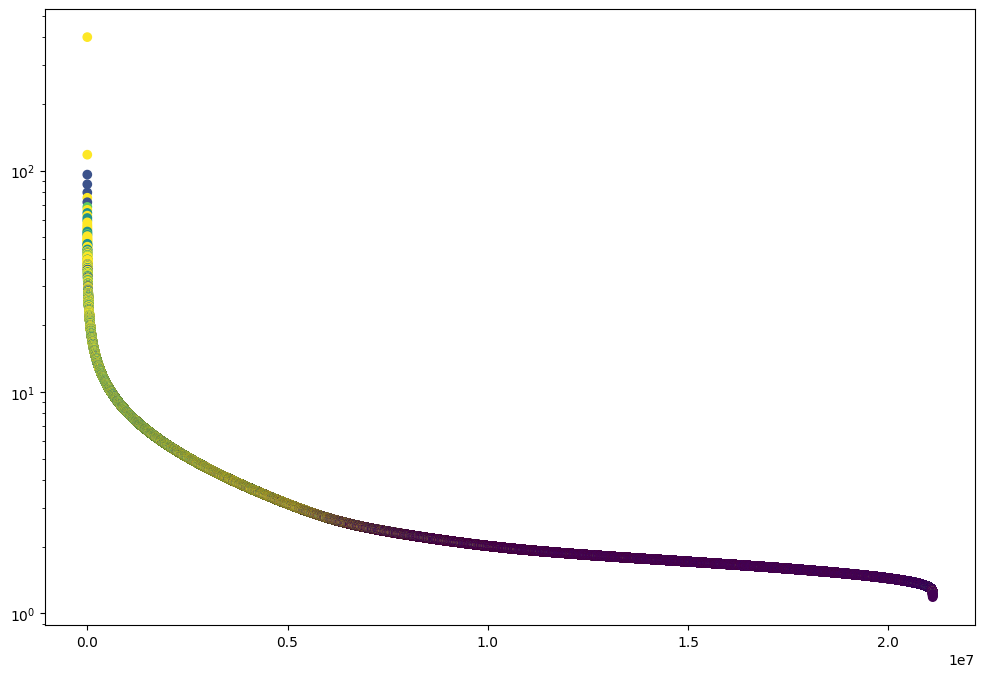

In [40]:
cgraph_4uneq = utils.compression_grouping(C_4uneq, cs_4uneq)[::-1]
step_size = 100
index = list(range(0, len(cgraph_4uneq), step_size))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.scatter(index, cgraph_4uneq[index, 0], c=cgraph_4uneq[index, 1])
# Set vertical scale to be logarithmic
plt.yscale('log')
plt.show()

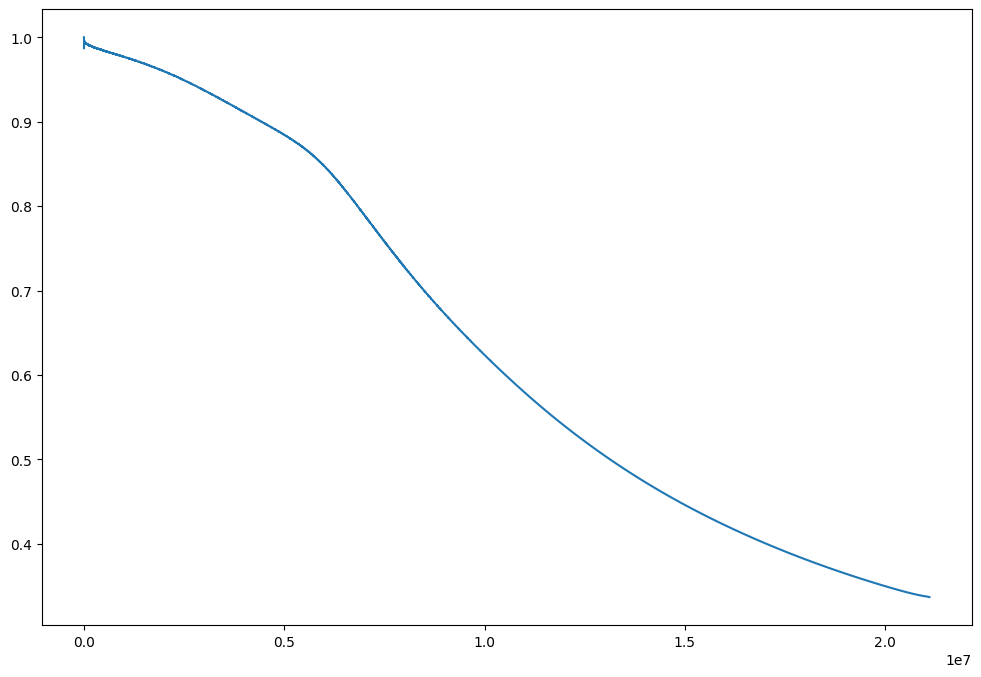

In [41]:
curr = 0
prop = []

for i in range(len(cgraph_4uneq)):
    if cgraph_4uneq[i, 1] != 0:
        curr += 1
    prop.append(curr / (i + 1))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.plot(range(len(prop)), prop)
plt.show()

In [3]:
sce_8eq = scanpy.read_h5ad('data/zheng/sce_full_Zhengmix8eq.h5ad')
data_8eq, cs_8eq, labels_8eq = utils.parse_h5ad(sce_8eq, "phenoid")
data_8eq = np.log2(data_8eq + 1)

In [4]:
C_8eq, avg_inter_8eq, avg_intra_8eq = utils.get_compressibility(data_8eq, cs_8eq, 8, True)
avg_inter_8eq, avg_intra_8eq

/Users/nikhildeorkar/code/school/pca-compression/utils.py:137: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D


(array([1.96029176, 2.78763153, 1.64416245, 1.92240446, 2.50613499,
        2.53041407, 2.66859201, 2.61453412]),
 array([3.96519263, 4.22673816, 4.13533096, 4.72395152, 3.99639542,
        5.1538768 , 4.61910297, 3.92501715]))

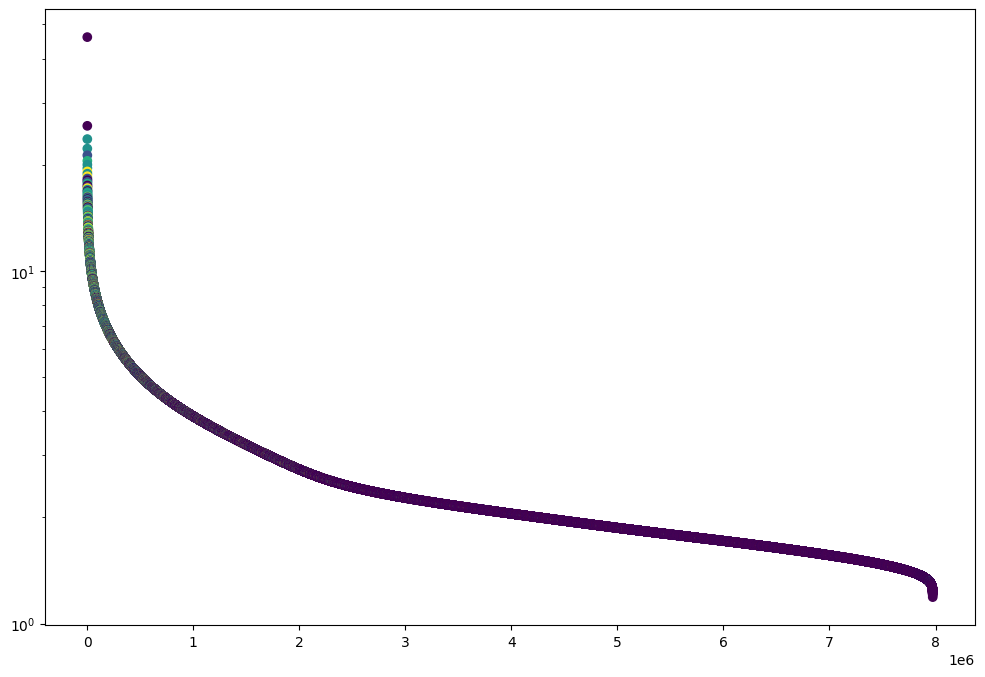

In [44]:
cgraph_8eq = utils.compression_grouping(C_8eq, cs_8eq)[::-1]
step_size = 100
index = list(range(0, len(cgraph_8eq), step_size))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.scatter(index, cgraph_8eq[index, 0], c=cgraph_8eq[index, 1])
# Set vertical scale to be logarithmic
plt.yscale('log')
plt.show()

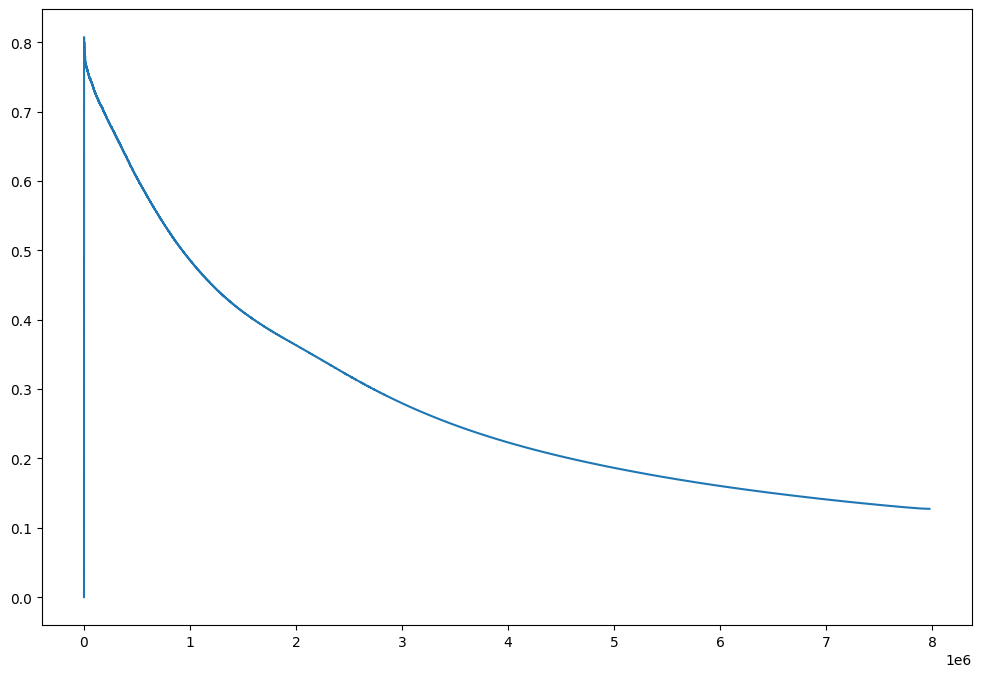

In [45]:
curr = 0
prop = []

for i in range(len(cgraph_8eq)):
    if cgraph_8eq[i, 1] != 0:
        curr += 1
    prop.append(curr / (i + 1))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.plot(range(len(prop)), prop)
plt.show()

In [39]:
"""
Outlier testing - 4eq
"""

data_4eq_outliers = data_4eq.copy()
cs_4eq_outliers = cs_4eq.copy()

o = 100
cs_4eq_outliers.append(o)

cluster_samples = []

In [40]:
for i in range(o): 
    clusters = np.random.choice(range(len(cs_4eq_outliers) - 1), size=2, replace=False)
    # weight = np.random.uniform(0.5, 0.7)
    weight = 0.5
    sample = [
        data_4eq_outliers[np.random.randint(sum(cs_4eq_outliers[:clusters[0]]), sum(cs_4eq_outliers[:clusters[0]+1]))],
        data_4eq_outliers[np.random.randint(sum(cs_4eq_outliers[:clusters[1]]), sum(cs_4eq_outliers[:clusters[1]+1]))]
    ]
    cluster_samples.append(clusters)
    point = (sample[0] * weight) + (sample[1] * (1 - weight))
    data_4eq_outliers = np.vstack((data_4eq_outliers, point))

In [41]:
"""
Compare norms of outliers with sample of cluster points
Weighted average of two random points in different clusters
"""
l2 = []
for i in range(len(cs_4eq_outliers) - 1): 
    point_idx = np.random.randint(sum(cs_4eq_outliers[:i]), sum(cs_4eq_outliers[:i+1]))
    l2.append(np.linalg.norm(data_4eq_outliers[point_idx]))

print("Non-outliers:")
print(l2)

l2_outliers = []
for i in range(o): 
    idx = -1 * (i + 1)
    dist = round(np.linalg.norm(data_4eq_outliers[idx]), 3)
    l2_outliers.append(dist)

print("Outliers:")
print(l2_outliers)

Non-outliers:
[23.6937009941352, 23.807712406086996, 25.123017720316113, 26.095897538883982]
Outliers:
[24.342, 19.721, 23.506, 19.712, 18.708, 28.144, 19.013, 22.287, 22.18, 20.758, 20.442, 23.842, 23.542, 25.147, 19.263, 22.692, 25.094, 18.831, 21.282, 18.268, 20.302, 24.305, 23.924, 24.711, 21.405, 19.664, 20.883, 18.575, 30.578, 35.726, 21.27, 21.622, 25.226, 25.576, 17.182, 24.179, 30.913, 21.233, 24.255, 25.597, 20.053, 18.29, 27.18, 19.961, 22.476, 32.864, 21.572, 23.457, 19.844, 26.891, 23.206, 22.803, 29.787, 22.434, 23.271, 17.838, 29.291, 23.567, 19.15, 19.855, 20.147, 28.514, 23.248, 24.555, 25.649, 25.043, 17.509, 22.914, 20.428, 24.481, 21.042, 22.379, 26.971, 26.42, 20.284, 32.943, 34.577, 23.364, 26.207, 22.928, 21.194, 25.846, 35.979, 25.699, 23.208, 20.2, 25.291, 23.549, 19.005, 29.184, 29.026, 23.595, 20.207, 21.667, 23.226, 25.479, 21.208, 19.744, 21.0, 23.069]


In [42]:
C_4eq_outliers, avg_inter_4eq_outliers, avg_intra_4eq_outliers = utils.get_compressibility(data_4eq_outliers, cs_4eq_outliers, 4, True)
avg_inter_4eq_outliers, avg_intra_4eq_outliers

/Users/nikhildeorkar/code/school/pca-compression/utils.py:137: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D


(array([2.03182018, 1.70312718, 2.26400146, 2.33693892, 2.45391817]),
 array([5.35814423, 5.28813713, 6.77815081, 5.26940143, 2.94355972]))

In [43]:
np.nan_to_num(C_4eq_outliers, copy=False)

array([[0.        , 6.29427304, 3.96139005, ..., 3.19262991, 1.95028474,
        2.21165661],
       [6.29427304, 0.        , 2.76617347, ..., 2.72534597, 2.0107267 ,
        2.15248221],
       [3.96139005, 2.76617347, 0.        , ..., 3.5670333 , 1.79587044,
        2.41861975],
       ...,
       [3.19262991, 2.72534597, 3.5670333 , ..., 0.        , 1.962169  ,
        2.73546504],
       [1.95028474, 2.0107267 , 1.79587044, ..., 1.962169  , 0.        ,
        3.08851376],
       [2.21165661, 2.15248221, 2.41861975, ..., 2.73546504, 3.08851376,
        0.        ]])

In [44]:
"""
Median variance of compressibility for outliers 
"""
outlier_var = [np.var(C_4eq_outliers[i]) for i in range(sum(cs_4eq_outliers) - o, sum(cs_4eq_outliers))]
np.median(outlier_var)

0.4624284981145741

In [45]:
"""
Median variance of compressibility for non-outliers
"""
non_outlier_var = [np.var(C_4eq_outliers[i]) for i in range(sum(cs_4eq_outliers) - o)]
np.median(non_outlier_var)

7.093688849038392

In [46]:
# Average compressibility of outliers with cluster 1, cluster 2, cluster 3, cluster 4

cluster_1_start = 0
cluster_2_start = sum(cs_4eq_outliers[:1])
cluster_3_start = sum(cs_4eq_outliers[:2])
cluster_4_start = sum(cs_4eq_outliers[:3])
outlier_start = sum(cs_4eq_outliers[:4])

ao1, ao2, ao3, ao4 = [], [], [], []

for i in range(cluster_1_start, cluster_2_start):
    for j in range(outlier_start, len(C_4eq_outliers)):
        # ao1 += np.linalg.norm(C_4eq_outliers[i][j])
        ao1.append(np.linalg.norm(C_4eq_outliers[i][j]))
# ao1 /= (cluster_2_start - cluster_1_start) * (len(C_4eq_outliers) - outlier_start)
ao1 = np.mean(ao1)

for i in range(cluster_2_start, cluster_3_start):
    for j in range(outlier_start, len(C_4eq_outliers)):
        # ao2 += np.linalg.norm(C_4eq_outliers[i][j])
        ao2.append(np.linalg.norm(C_4eq_outliers[i][j]))
# ao2 /= (cluster_3_start - cluster_2_start) * (len(C_4eq_outliers) - outlier_start)
ao2 = np.mean(ao2)

for i in range(cluster_3_start, cluster_4_start):
    for j in range(outlier_start, len(C_4eq_outliers)):
        # ao3 += np.linalg.norm(C_4eq_outliers[i][j])
        ao3.append(np.linalg.norm(C_4eq_outliers[i][j]))
# ao3 /= (cluster_4_start - cluster_3_start) * (len(C_4eq_outliers) - outlier_start)
ao3 = np.mean(ao3)

for i in range(cluster_4_start, outlier_start):
    for j in range(outlier_start, len(C_4eq_outliers)):
        # ao4 += np.linalg.norm(C_4eq_outliers[i][j])
        ao4.append(np.linalg.norm(C_4eq_outliers[i][j]))
# ao4 /= (outlier_start - cluster_4_start) * (len(C_4eq_outliers) - outlier_start)
ao4 = np.mean(ao4)

ao1, ao2, ao3, ao4

(2.4010477757051056, 1.984096102661365, 2.613535968747268, 2.8183525061927837)

In [47]:
outlier_compres = [] * o

for i in range(o):
    c1 = []
    c2 = []
    c3 = []
    c4 = []
    currOutlier = outlier_start + i

    for j in range(cluster_1_start, cluster_2_start):
        c1.append(np.linalg.norm(C_4eq_outliers[j][currOutlier]))
    c1 = np.mean(c1)

    for j in range(cluster_2_start, cluster_3_start):
        c2.append(np.linalg.norm(C_4eq_outliers[j][currOutlier]))
    c2 = np.mean(c2)

    for j in range(cluster_3_start, cluster_4_start):
        c3.append(np.linalg.norm(C_4eq_outliers[j][currOutlier]))
    c3 = np.mean(c3)

    for j in range(cluster_4_start, outlier_start):
        c4.append(np.linalg.norm(C_4eq_outliers[j][currOutlier]))
    c4 = np.mean(c4)

    outlier_compres.append([c1, c2, c3, c4])

In [48]:
outlier_compres

[[2.1036471223394373,
  1.6573324863384846,
  3.846969291873125,
  4.978286960637626],
 [2.118076435258666, 2.266464254555185, 2.303496153209733, 2.68648208381251],
 [2.261705789168943, 2.440701020927002, 1.837910902268842, 2.0523956396333856],
 [2.621565492312659,
  2.2962218496194384,
  1.921352477983855,
  2.1080497510270684],
 [2.085559082054817,
  1.5682644654839006,
  4.548759453179306,
  4.7191583157976345],
 [3.4162245923855075,
  1.62883880655657,
  3.0474350155954233,
  2.7349057184970853],
 [2.6462626664072415,
  2.259117027937783,
  1.9168028327631144,
  2.1110841825639746],
 [2.2011294878429735,
  2.6725631571888897,
  1.7910194046928047,
  2.0893543203150036],
 [2.205978066100357, 1.61263186154303, 4.7335799676016, 4.521129777942084],
 [2.0945436578988077,
  1.8226103676073708,
  2.2920735298644623,
  2.1592118355208707],
 [2.91410958654795,
  1.4832219559899826,
  2.7934597807027033,
  2.1787504102059327],
 [1.9841719593181957,
  2.442696283475078,
  1.9302475882820485,


In [49]:
cluster_samples

[array([2, 3]),
 array([2, 1]),
 array([0, 1]),
 array([1, 0]),
 array([2, 3]),
 array([2, 0]),
 array([1, 0]),
 array([1, 0]),
 array([3, 2]),
 array([2, 1]),
 array([0, 2]),
 array([1, 2]),
 array([0, 3]),
 array([0, 2]),
 array([2, 1]),
 array([0, 2]),
 array([0, 3]),
 array([3, 1]),
 array([2, 0]),
 array([0, 2]),
 array([2, 3]),
 array([0, 3]),
 array([0, 3]),
 array([0, 1]),
 array([1, 3]),
 array([3, 1]),
 array([3, 2]),
 array([1, 3]),
 array([1, 0]),
 array([0, 3]),
 array([0, 3]),
 array([0, 1]),
 array([3, 0]),
 array([1, 3]),
 array([1, 0]),
 array([3, 2]),
 array([2, 1]),
 array([2, 3]),
 array([1, 0]),
 array([2, 1]),
 array([1, 2]),
 array([2, 0]),
 array([0, 1]),
 array([1, 3]),
 array([1, 3]),
 array([1, 2]),
 array([3, 1]),
 array([1, 3]),
 array([3, 2]),
 array([3, 0]),
 array([0, 2]),
 array([1, 2]),
 array([3, 2]),
 array([0, 3]),
 array([1, 2]),
 array([0, 3]),
 array([0, 1]),
 array([3, 0]),
 array([1, 3]),
 array([1, 0]),
 array([2, 0]),
 array([3, 1]),
 array([

In [51]:
np.nan_to_num(C_4eq_outliers, copy=False, nan=0.0)
comp_var = [0] * len(C_4eq_outliers)
for i in range(len(C_4eq_outliers)): 
    # comp_var[i] = np.var(C[i])
    comp_var[i] = utils.var(C_4eq_outliers[i], 2)
combined_var = [(True if i >= (sum(cs_4eq_outliers) - o) else False, comp_var[i], i) for i in range(len(C_4eq_outliers))]
combined_var.sort(key=lambda x: x[1])
print(combined_var)

[(False, 0.21757023016093568, 1458), (False, 0.22876868556081986, 1380), (False, 0.2575739089186637, 456), (False, 0.28682261147373084, 1758), (False, 0.28862522578619854, 3147), (False, 0.32641854630382916, 2303), (False, 0.3279225463187317, 1115), (False, 0.33494014595210586, 3001), (False, 0.3478260535315253, 3781), (False, 0.35473722400809965, 1030), (False, 0.3606727294743244, 1185), (False, 0.3633869903425181, 1127), (False, 0.36446702000773207, 1124), (False, 0.36809684979516816, 1138), (False, 0.3797387003351411, 3156), (False, 0.38017110637615814, 3974), (False, 0.3826920401406906, 1920), (False, 0.38344857297511226, 1511), (False, 0.3859145397919502, 1762), (False, 0.39273237835458996, 1793), (False, 0.3981204044678567, 2472), (False, 0.39996971973377676, 570), (False, 0.402403080796279, 1506), (False, 0.40432618889287353, 1220), (False, 0.4062860516217132, 3333), (False, 0.40670011873786976, 916), (False, 0.40671177828428157, 136), (False, 0.40872597309905806, 3949), (False,

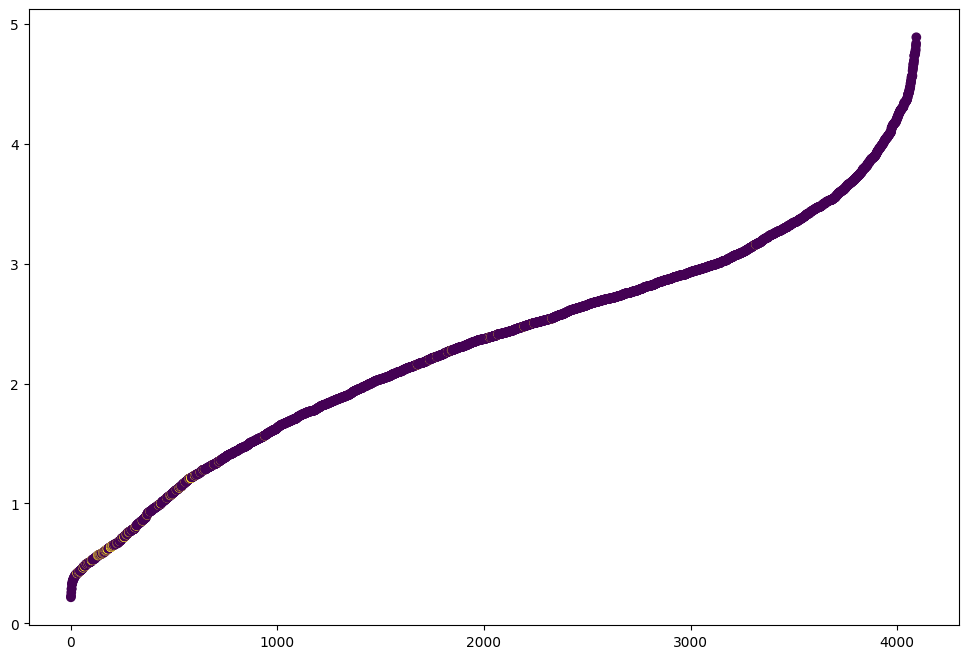

In [52]:
index = list(range(0, len(combined_var)))
variances = [combined_var[i][1] for i in index] 
colors = [combined_var[i][0] for i in index] 

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.scatter(index, variances, c=colors)
# Set vertical scale to be logarithmic
plt.show()

In [53]:
before = [0] * o
curr = 0
count = 0
for out, _, __ in combined_var: 
    if out: 
        before[curr] = count
        curr += 1
    else: 
        count += 1

In [54]:
before

[31,
 31,
 37,
 40,
 55,
 61,
 61,
 69,
 75,
 81,
 91,
 91,
 93,
 118,
 119,
 119,
 120,
 121,
 123,
 124,
 127,
 128,
 133,
 134,
 135,
 137,
 141,
 144,
 146,
 148,
 148,
 148,
 148,
 160,
 160,
 160,
 161,
 161,
 163,
 164,
 165,
 165,
 170,
 181,
 183,
 192,
 204,
 211,
 211,
 220,
 221,
 230,
 231,
 241,
 257,
 262,
 291,
 312,
 326,
 367,
 376,
 376,
 403,
 418,
 420,
 425,
 446,
 458,
 463,
 466,
 485,
 502,
 504,
 508,
 508,
 508,
 508,
 523,
 523,
 529,
 547,
 561,
 567,
 610,
 633,
 641,
 853,
 1592,
 1650,
 1683,
 1735,
 1753,
 1755,
 1935,
 1941,
 1974,
 2099,
 2146,
 2232,
 3218]